In [1]:
import xarray as xr
import pandas as pd
path = '/Users/ls/Downloads/data.grib'
df1 = xr.open_dataset(path)

skipping variable: paramId==140230 shortName='mwd'
Traceback (most recent call last):
  File "/Users/ls/opt/anaconda3/lib/python3.12/site-packages/cfgrib/dataset.py", line 721, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/Users/ls/opt/anaconda3/lib/python3.12/site-packages/cfgrib/dataset.py", line 639, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='latitude' value=Variable(dimensions=('latitude',), data=array([ 24.  ,  23.75,  23.5 ,  23.25,  23.  ,  22.75,  22.5 ,  22.25,
        22.  ,  21.75,  21.5 ,  21.25,  21.  ,  20.75,  20.5 ,  20.25,
        20.  ,  19.75,  19.5 ,  19.25,  19.  ,  18.75,  18.5 ,  18.25,
        18.  ,  17.75,  17.5 ,  17.25,  17.  ,  16.75,  16.5 ,  16.25,
        16.  ,  15.75,  15.5 ,  15.25,  15.  ,  14.75,  14.5 ,  14.25,
        14.  ,  13.75,  13.5 ,  13.25,  13.  ,  12.75,  12.5 ,  12.25,
        12.  ,  11.75,  11.5 ,  11.25,  11.  ,  10.75,  10.5 ,

In [61]:
import json
data_in = [{
    "id": 10,
    "wd_min": "8,7",
    "wwl": "40.0",
    "lwl": "80.0",
    "wvpi": "4000,10000",
    "ukc": "1.5",
    "dx_min": "0.1",
    "blend": "1.0",
    "nl_c": "3.0",
    "nl_m": "2.5"
}
]
# data_in = "/Users/ls/Desktop/ship_data.json"
df = pd.DataFrame([data_in])
df.loc[0,'wvpi'].split(',')

KeyError: 'wvpi'

In [2]:
df1

<xarray.Dataset>
Dimensions:     (time: 1632, latitude: 257, longitude: 401)
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 2019-01-01 ... 2024-08-01T23:00:00
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 24.0 23.75 23.5 23.25 ... -39.5 -39.75 -40.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 99.25 99.5 99.75 100.0
    valid_time  (time) datetime64[ns] ...
Data variables:
    u10         (time, latitude, longitude) float32 ...
    v10         (time, latitude, longitude) float32 ...
    meanSea     float64 ...
    sst         (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-08-30T11:38 GRIB to CDM+CF via cfgrib-0.9.1...

In [31]:
u10 = df1.u10.data[1:100,1:100,1:100]  # Extract u10 data
v10 = df1.v10.data[1:100,1:100,1:100]  # Extract v10 data
time = df1.time.data[1:100]  # Extract time data
latitudes = df1.latitude.data[1:100]  # Extract latitude data
longitudes = df1.longitude.data[257:158:-1]  # Extract longitude data


In [4]:
len(latitudes)

99

In [5]:
(pd.DataFrame([latitudes,longitudes,u10]).T).iloc[0:62]

0      1                                                  2
0   23.75  64.25  [[-2.4787598, -2.2785645, -2.1281738, -2.03149...
1    23.5   64.0  [[-2.643036, -2.3940125, -2.1752625, -2.006317...
2   23.25  63.75  [[-2.6521149, -2.4519196, -2.2761383, -2.13746...
3    23.0   63.5  [[-2.7731476, -2.6461945, -2.5319366, -2.41963...
4   22.75  63.25  [[-2.8013153, -2.6821747, -2.5737762, -2.44682...
..    ...    ...                                                ...
57    9.5   50.0  [[-3.8900604, -3.6840057, -3.5111542, -3.40275...
58   9.25  49.75  [[-4.2444, -4.110611, -4.0334625, -4.014908, -...
59    9.0   49.5  [[-4.8278656, -4.788803, -4.7682953, -4.749740...
60   8.75  49.25  [[-5.194763, -5.142029, -5.0932007, -5.032654,...
61    8.5   49.0  [[-5.0303497, -4.976639, -4.924881, -4.860428,...

[62 rows x 3 columns]

In [6]:
df1

<xarray.Dataset>
Dimensions:     (time: 1632, latitude: 257, longitude: 401)
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 2019-01-01 ... 2024-08-01T23:00:00
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 24.0 23.75 23.5 23.25 ... -39.5 -39.75 -40.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 99.25 99.5 99.75 100.0
    valid_time  (time) datetime64[ns] ...
Data variables:
    u10         (time, latitude, longitude) float32 -2.734 -2.582 ... 5.798
    v10         (time, latitude, longitude) float32 -4.549 -4.678 ... -7.476
    meanSea     float64 ...
    sst         (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-08-30T11:38 GRIB to CDM+CF via cfgrib-0.9.1...

In [7]:
import numpy as np

# Create nodes from latitude and longitude pairs
nodes = np.array([[lat, lon] for lat in latitudes for lon in longitudes])
# latitudes = latitudes[:, :100]
# longitudes = longitude[:, :100]
# u10 = u10[:, :100]  # Subset the first 100 nodes, for example
# v10 = v10[:, :100]
# nodes = nodes[:100]
# time = time[:100]


# Reshape u10 and v10 to match the required shape: (time_steps, total_nodes)
u = u10.reshape(len(time), len(latitudes) * len(longitudes))
v = v10.reshape(len(time), len(latitudes) * len(longitudes))


In [8]:
import numpy as np
from datetime import datetime
from scipy.interpolate import griddata

from halem import BaseRoadmap, HALEM_space, HALEM_time, plot_timeseries, HALEM_cost,HALEM_co2

import matplotlib.pyplot as plt

In [9]:
import numpy as np
from halem import BaseRoadmap

class CustomRoadmap(BaseRoadmap):
    def __init__(
        self,
        u10,  # The u10 wind component
        v10,  # The v10 wind component
        time,  # Time variable from your dataset
        nodes,  # Nodes (latitude and longitude grid points)
        number_of_neighbor_layers=2,  # You can adjust this based on your grid resolution
        vship=np.array([[10, 40, 80], [10, 50, 100]]),
        WD_min=np.array([8, 7]),
        WVPI=np.array([4000, 10000]),
        WWL=40,
        LWL=80,
        ukc=1.5,
        nl=(3, 2.5),
        blend=1,
        nodes_index=None,
        *args,
        **kwargs
    ):
        # Convert time to numeric format
        self.time = time.astype('datetime64[ns]').astype(np.float64)
        self.u10 = u10
        self.v10 = v10
        self.nodes = nodes
        super().__init__(
            number_of_neighbor_layers=number_of_neighbor_layers,
            vship=vship,
            WD_min=WD_min,
            WVPI=WVPI,
            WWL=WWL,
            LWL=LWL,
            ukc=ukc,
            nl=nl,
            blend=blend,
            nodes_index=nodes_index,
            *args,
            **kwargs
        )

    def load(self):
        """This method loads the necessary data for the roadmap.
        It returns a dictionary with keys corresponding to time, nodes, u, v, and water depth.
        """
        # Assuming a constant water depth (WD)
        WD = np.full(self.u10.shape, 50)  # Adjust water depth as needed

        return {
            "time": self.time,
            "nodes": self.nodes,
            "u": self.u10,
            "v": self.v10,
            "water_depth": WD,
        }
    def parse(self):
        print("Loading hydrodynamic data...")
        self.load_hydrodynamic()
        print("Hydrodynamic data loaded.")

        # 'Calculate nodes and flow conditions in nodes'
        if self.nodes_index is None:
            print("Reducing nodes...")
            self.nodes_index, self.LS = self.get_nodes()
            print("Node reduction completed.")
        else:
            self.nodes_index = self.nodes_index
            self.LS = None
            print("Using precomputed nodes index.")
    
        nodes = self.nodes[self.nodes_index]
        u = np.asarray(np.transpose(self.u))[self.nodes_index]
        v = np.asarray(np.transpose(self.v))[self.nodes_index]
        WD = np.asarray(np.transpose(self.WD))[self.nodes_index]
    
        print("Nodes, u, v, WD loaded for land.")
        self.nodes, self.u, self.v, self.WD = self.nodes_on_land(nodes, u, v, WD)
        self.tria = scipy.spatial.Delaunay(self.nodes)
        self.mask = np.full(self.u.shape, False)
        self.mask[self.WD < self.WD_min.max() + self.ukc] = True
        print("Mask applied.")
    
        # 'Calculate edges'
        print("Calculating edges...")
        graph0 = Graph()
        for from_node in range(len(self.nodes)):
            if from_node % 100 == 0:  # Print progress every 100 nodes
                print(f"Processed {from_node} nodes out of {len(self.nodes)}")
            to_nodes = functions.find_neighbors2(
                from_node, self.tria, self.number_of_neighbor_layers
            )
            for to_node in to_nodes:
                L = functions.haversine(self.nodes[from_node], self.nodes[int(to_node)])
                graph0.add_edge(from_node, int(to_node), L)
        self.graph = Graph()
        vship1 = self.vship[0]
        for edge in graph0.weights:
            for i in range(len(vship1)):
                for j in range(len(vship1)):
                    from_node = edge[0]
                    to_node = edge[1]
                    self.graph.add_edge((from_node, i), (to_node, j), 1)

        print("Edge calculation completed.")
        # 'Calculate Weights'
        calc_weights = self.calc_weights_time
        self.weight_space = []
        self.weight_time = []
        self.weight_cost = []
        self.weight_co2 = []

        for vv in range(len(self.vship)):
            print(f"doing{vv}")
            graph_time = Graph()
            graph_space = Graph()
            graph_cost = Graph()
            graph_co2 = Graph()
            vship = self.vship[vv]
            WD_min = self.WD_min[vv]
            WVPI = self.WVPI[vv]
            for edge in graph0.weights:
                for i in range(len(vship)):
                    for j in range(len(vship)):
                        from_node = edge[0]
                        to_node = edge[1]

                        L, W, euros, co2 = calc_weights(
                            edge,
                            i,
                            j,
                            vship,
                            WD_min,
                            WVPI,
                            self,
                            self.compute_cost,
                            self.compute_co2,
                            self.number_of_neighbor_layers,
                        )

                        graph_time.add_edge((from_node, i), (to_node, j), W)
                        graph_space.add_edge((from_node, i), (to_node, j), L)
                        graph_cost.add_edge((from_node, i), (to_node, j), euros)
                        graph_co2.add_edge((from_node, i), (to_node, j), co2)

            if "space" in self.optimization_type:
                self.weight_space.append(graph_space)
            if "time" in self.optimization_type:
                self.weight_time.append(graph_time)
            if "cost" in self.optimization_type:
                self.weight_cost.append(graph_cost)
            if "co2" in self.optimization_type:
                self.weight_co2.append(graph_co2)

    def calc_weights_time(
        self,
        edge,
        i,
        j,
        vship,
        WD_min,
        WVPI,
        self_f,
        compute_cost,
        compute_co2,
        number_of_neighbor_layers,
    ):
        """Function that retruns the weight of an arc"""
        from_node = edge[0]
        W = (
            functions.costfunction_timeseries(
                edge,
                vship[j],
                WD_min,
                self_f,
                WVPI,
                number_of_neighbor_layers,
                self_f.tria,
            )
            + self_f.t
        )
        W = self.fifo_maker(W, self_f.mask[from_node]) - self_f.t

        L = functions.costfunction_spaceseries(
            edge, vship[j], WD_min, self_f, WVPI, number_of_neighbor_layers, self_f.tria
        )
        L = L + np.arange(len(L)) * (1 / len(L))
        L = self.fifo_maker(L, self_f.mask[from_node]) - np.arange(len(L)) * (
            1 / len(L)
        )
        euros = compute_cost(W, vship[j])
        co2 = compute_co2(W, vship[j])

        return L, W, euros, co2

    @staticmethod
    def fifo_maker(y, N1):
        """Makes a FIFO time series from a Non-FIFO time series
        y:  Time series
        N1: Mask file of the time series
        """
        arg = np.squeeze(argrelextrema(y, np.less))
        if arg.shape == ():
            arg = np.array([arg])
        else:
            None
        y_FIFO = 1 * y
        for a in arg:
            loc = np.argwhere(y[: a + 1] <= y[a])[-2:]
            if loc.shape == (2, 1):
                if (N1[int(loc[0]) : int(loc[1])]).any():

                    None
                else:
                    y_FIFO[int(loc[0]) : int(loc[1])] = y[a].item()

        return y_FIFO

        


In [10]:
# Create an instance of CustomRoadmap
roadmap = CustomRoadmap(
    u10=u,  # Replace with your u10 data array
    v10=v,  # Replace with your v10 data array
    time=time,  # Replace with your time array
    nodes=nodes,
    dx_min=0.1 # Replace with your nodes (latitude, longitude) array
)

# Parse the data to prepare for optimization
class Graph:
    """class that contains the nodes, arcs, and weights for the time-dependent,
    directional, weighted, and Non-FIFO graph of the route optimization problem.
    This class is used multiple times in the halem.mesh_maker.GraphFlowModel()
    function"""

    def __init__(self):
        """
        self.edges is a dict of all possible next nodes
        e.g. {'X': ['A', 'B', 'C', 'E'], ...}
        self.weights has all the weights between two nodes,
        with the two nodes as a tuple as the key
        e.g. {('X', 'A'): 7, ('X', 'B'): 2, ...}
        """
        self.edges = defaultdict(list)
        self.weights = {}

    def add_edge(self, from_node, to_node, weight):
        # Note: assumes edges are directional
        self.edges[from_node].append(to_node)
        self.weights[(from_node, to_node)] = weight



In [11]:
from abc import ABC, abstractmethod
from collections import defaultdict

import numpy as np
import scipy.spatial
from numpy import ma
from scipy.signal import argrelextrema

import halem.functions as functions

roadmap.parse()

Loading hydrodynamic data...
Hydrodynamic data loaded.
Reducing nodes...
Node reduction completed.
Nodes, u, v, WD loaded for land.
Mask applied.
Calculating edges...
Processed 0 nodes out of 9801
Processed 100 nodes out of 9801
Processed 200 nodes out of 9801
Processed 300 nodes out of 9801
Processed 400 nodes out of 9801
Processed 500 nodes out of 9801
Processed 600 nodes out of 9801
Processed 700 nodes out of 9801
Processed 800 nodes out of 9801
Processed 900 nodes out of 9801
Processed 1000 nodes out of 9801
Processed 1100 nodes out of 9801
Processed 1200 nodes out of 9801
Processed 1300 nodes out of 9801
Processed 1400 nodes out of 9801
Processed 1500 nodes out of 9801
Processed 1600 nodes out of 9801
Processed 1700 nodes out of 9801
Processed 1800 nodes out of 9801
Processed 1900 nodes out of 9801
Processed 2000 nodes out of 9801
Processed 2100 nodes out of 9801
Processed 2200 nodes out of 9801
Processed 2300 nodes out of 9801
Processed 2400 nodes out of 9801
Processed 2500 nodes

/var/folders/9p/34kjp0md5tv5sz77mfqf7y440000gn/T/ipykernel_2722/1717713932.py:212: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  if (N1[int(loc[0]) : int(loc[1])]).any():
/var/folders/9p/34kjp0md5tv5sz77mfqf7y440000gn/T/ipykernel_2722/1717713932.py:216: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_FIFO[int(loc[0]) : int(loc[1])] = y[a].item()


doing1


In [12]:
longitudes

array([64.25, 64.  , 63.75, 63.5 , 63.25, 63.  , 62.75, 62.5 , 62.25,
       62.  , 61.75, 61.5 , 61.25, 61.  , 60.75, 60.5 , 60.25, 60.  ,
       59.75, 59.5 , 59.25, 59.  , 58.75, 58.5 , 58.25, 58.  , 57.75,
       57.5 , 57.25, 57.  , 56.75, 56.5 , 56.25, 56.  , 55.75, 55.5 ,
       55.25, 55.  , 54.75, 54.5 , 54.25, 54.  , 53.75, 53.5 , 53.25,
       53.  , 52.75, 52.5 , 52.25, 52.  , 51.75, 51.5 , 51.25, 51.  ,
       50.75, 50.5 , 50.25, 50.  , 49.75, 49.5 , 49.25, 49.  , 48.75,
       48.5 , 48.25, 48.  , 47.75, 47.5 , 47.25, 47.  , 46.75, 46.5 ,
       46.25, 46.  , 45.75, 45.5 , 45.25, 45.  , 44.75, 44.5 , 44.25,
       44.  , 43.75, 43.5 , 43.25, 43.  , 42.75, 42.5 , 42.25, 42.  ,
       41.75, 41.5 , 41.25, 41.  , 40.75, 40.5 , 40.25, 40.  , 39.75])

In [13]:
latitudes

array([23.75, 23.5 , 23.25, 23.  , 22.75, 22.5 , 22.25, 22.  , 21.75,
       21.5 , 21.25, 21.  , 20.75, 20.5 , 20.25, 20.  , 19.75, 19.5 ,
       19.25, 19.  , 18.75, 18.5 , 18.25, 18.  , 17.75, 17.5 , 17.25,
       17.  , 16.75, 16.5 , 16.25, 16.  , 15.75, 15.5 , 15.25, 15.  ,
       14.75, 14.5 , 14.25, 14.  , 13.75, 13.5 , 13.25, 13.  , 12.75,
       12.5 , 12.25, 12.  , 11.75, 11.5 , 11.25, 11.  , 10.75, 10.5 ,
       10.25, 10.  ,  9.75,  9.5 ,  9.25,  9.  ,  8.75,  8.5 ,  8.25,
        8.  ,  7.75,  7.5 ,  7.25,  7.  ,  6.75,  6.5 ,  6.25,  6.  ,
        5.75,  5.5 ,  5.25,  5.  ,  4.75,  4.5 ,  4.25,  4.  ,  3.75,
        3.5 ,  3.25,  3.  ,  2.75,  2.5 ,  2.25,  2.  ,  1.75,  1.5 ,
        1.25,  1.  ,  0.75,  0.5 ,  0.25,  0.  , -0.25, -0.5 , -0.75])

In [14]:
t0 = "01/01/2024 00:00:00"  # Departure time

start = ( 64, 28)
stop = ( 51, 11)
v_max = 8


path_t, time_t, dist_t = HALEM_time(start, stop, t0, v_max, roadmap)
path_s, time_s, dist_s = HALEM_space(start, stop, t0, v_max, roadmap)
path_c, time_c, dist_c = HALEM_cost(start, stop, t0, v_max, roadmap)
path_p, time_p, dist_p = HALEM_co2(start, stop, t0, v_max, roadmap)

In [15]:
path_t

array([[64.  , 23.75],
       [63.5 , 23.5 ],
       [63.  , 23.25],
       [62.5 , 22.75],
       [62.25, 22.5 ],
       [62.  , 22.25],
       [61.75, 22.  ],
       [61.5 , 21.75],
       [61.25, 21.5 ],
       [61.  , 21.25],
       [60.5 , 20.75],
       [60.25, 20.5 ],
       [60.  , 20.25],
       [59.75, 20.  ],
       [59.25, 19.75],
       [58.75, 19.5 ],
       [58.25, 19.  ],
       [57.75, 18.5 ],
       [57.5 , 18.25],
       [57.25, 18.  ],
       [57.  , 17.75],
       [56.75, 17.5 ],
       [56.5 , 17.25],
       [56.25, 17.  ],
       [56.  , 16.75],
       [55.75, 16.5 ],
       [55.5 , 16.25],
       [55.25, 16.  ],
       [55.  , 15.5 ],
       [54.5 , 15.  ],
       [54.25, 14.75],
       [54.  , 14.5 ],
       [53.75, 14.  ],
       [53.5 , 13.5 ],
       [53.25, 13.25],
       [53.  , 13.  ],
       [52.75, 12.75],
       [52.5 , 12.5 ],
       [52.25, 12.25],
       [52.  , 12.  ],
       [51.75, 11.75],
       [51.5 , 11.5 ],
       [51.25, 11.25],
       [51.

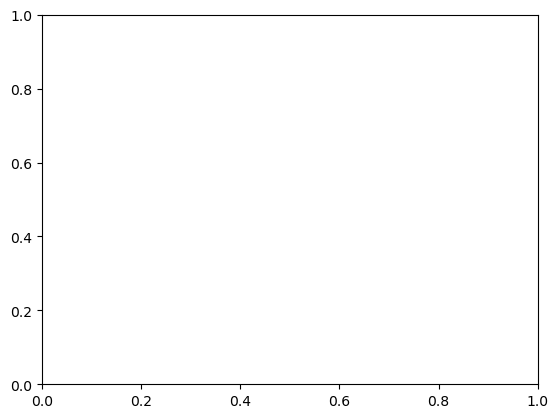

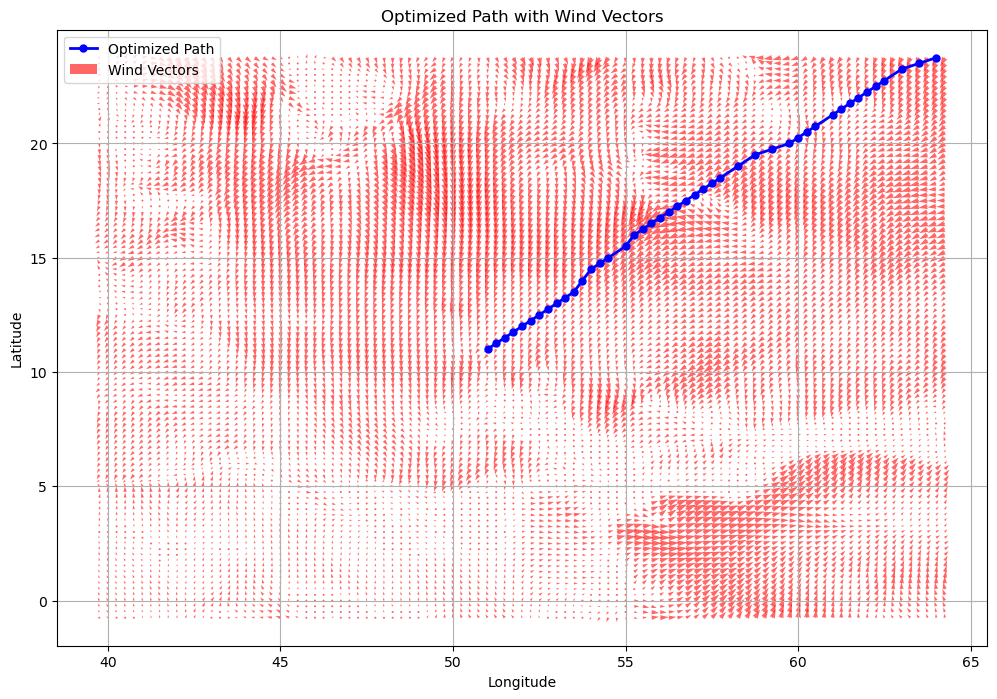

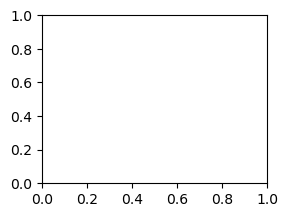

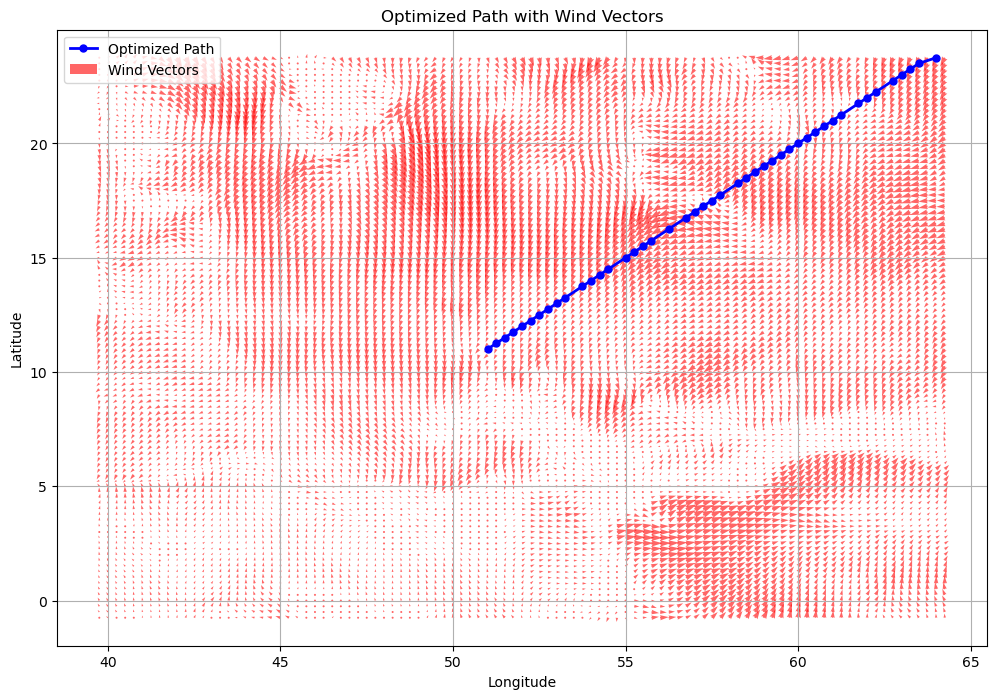

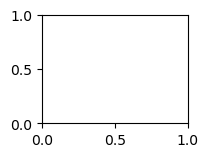

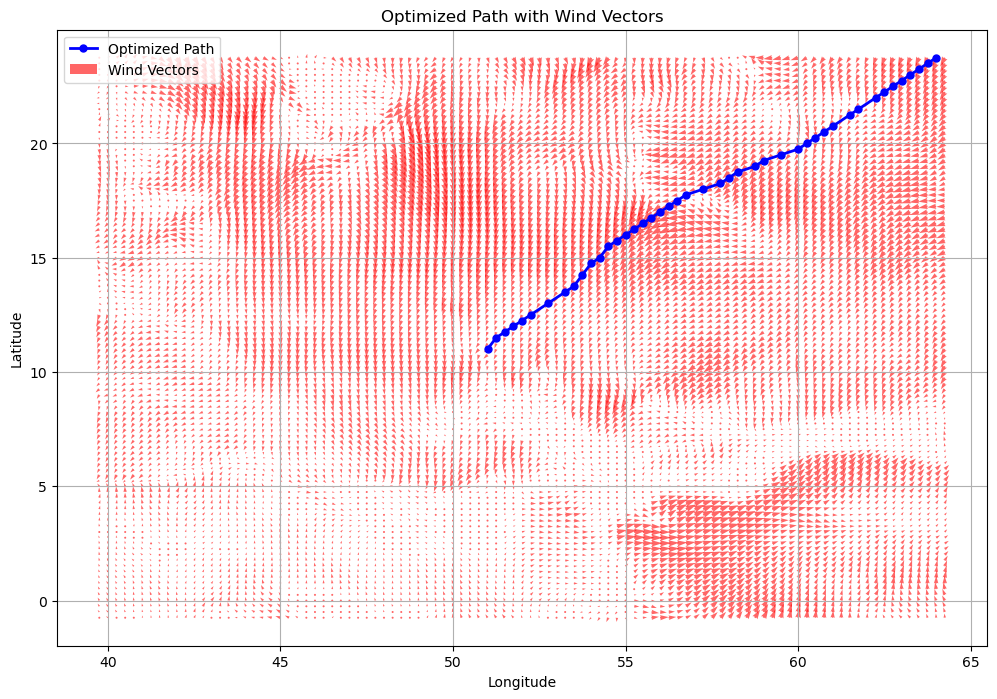

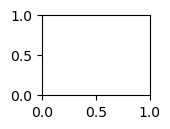

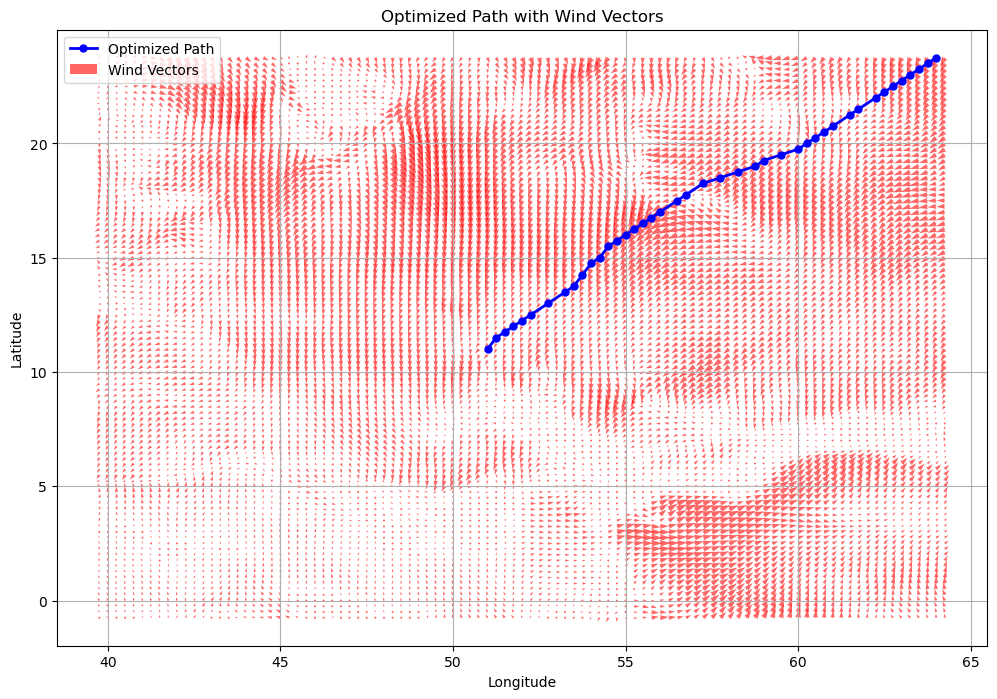

<Axes: >

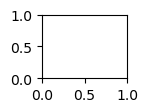

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def plot_path_with_wind(path, u10, v10, lats, lons, title="Optimized Path with Wind Vectors", color='blue'):
    """
    Function to plot the optimized path with wind vectors.
    
    Parameters:
    - path: Numpy array containing the latitude and longitude coordinates of the path.
    - u10: Numpy array of u10 wind component.
    - v10: Numpy array of v10 wind component.
    - lats: Numpy array of latitude values for the wind data.
    - lons: Numpy array of longitude values for the wind data.
    - title: Title of the plot.
    - color: Color of the path.
    """
    latitudes = path[:, 1]
    longitudes = path[:, 0]
    
    plt.figure(figsize=(12, 8))
    
    # Plot the path
    plt.plot(longitudes, latitudes, color=color, marker='o', linestyle='-', linewidth=2, markersize=5, label="Optimized Path")
    
    # Plot the wind vectors using quiver
    plt.quiver(lons, lats, u10, v10, scale=500, color='red', alpha=0.6, label="Wind Vectors")
    
    plt.title(title)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage of the plot_path_with_wind function
# Assuming `optimized_path` is the result from your HALEM function
# and `u10`, `v10`, `lats`, and `lons` are your wind data arrays
# optimized_path = np.array(...)  # Replace this with your actual path data
# u10 = np.array(...)  # Your u10 wind component data
# v10 = np.array(...)  # Your v10 wind component data
# lats = np.array(...)  # Latitude values corresponding to wind data
# lons = np.array(...)  # Longitude values corresponding to wind data
plt.subplot(1,1,1)
plot_path_with_wind(path_t, u10[0], v10[0], latitudes, longitudes)
plt.subplot(2,2,2)
plot_path_with_wind(path_s, u10[0], v10[0], latitudes, longitudes)
plt.subplot(3,3,3)
plot_path_with_wind(path_c, u10[0], v10[0], latitudes, longitudes)
plt.subplot(4,4,4)
plot_path_with_wind(path_p, u10[0], v10[0], latitudes, longitudes)
plt.subplot(5,5,5)

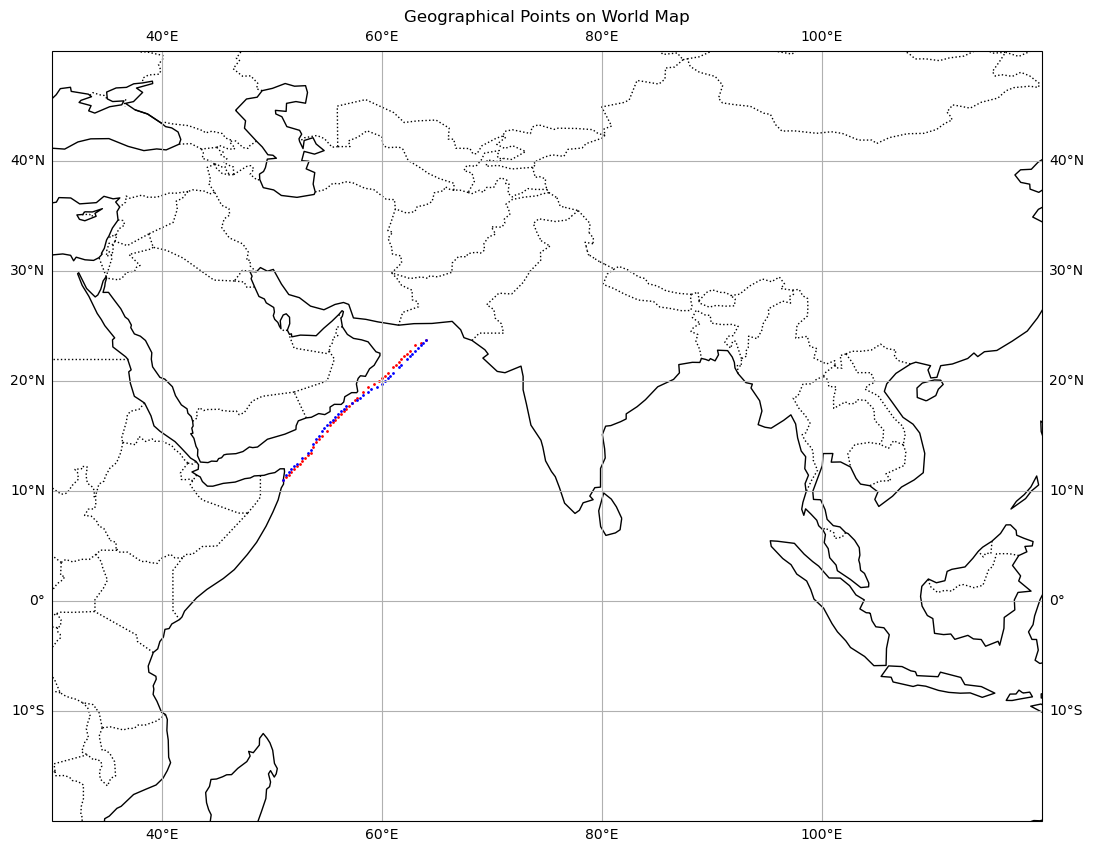

In [17]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Example coordinates (replace these with your own data)
time_df = pd.DataFrame(path_t)
longitudes_t = [time_df.loc[i,0] for i in range(time_df.shape[0])]  # Example latitudes (Delhi, Mumbai, Bangalore, Kolkata)
latitudes_t = [time_df.loc[i,1] for i in range(time_df.shape[0])]  # Example longitudes

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Initialize the plot with a specific projection
plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([30, 120, -20, 50], crs=ccrs.PlateCarree())

# Add features to the map (e.g., coastlines, borders)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot each point
for lat, lon in zip(latitudes_t, longitudes_t):
    plt.plot(lon, lat, marker='o', color='red', markersize=1, transform=ccrs.PlateCarree())
time_df = pd.DataFrame(path_c)
longitudes_c = [time_df.loc[i,0] for i in range(time_df.shape[0])]  # Example latitudes (Delhi, Mumbai, Bangalore, Kolkata)
latitudes_c = [time_df.loc[i,1] for i in range(time_df.shape[0])]  # Example longitudes
for lat, lon in zip(latitudes_c, longitudes_c):
    plt.plot(lon, lat, marker='o', color='blue', markersize=1, transform=ccrs.PlateCarree())

# Optionally add gridlines and labels
ax.gridlines(draw_labels=True)

# Add a title
plt.title('Geographical Points on World Map')

# Show the plot
plt.show()

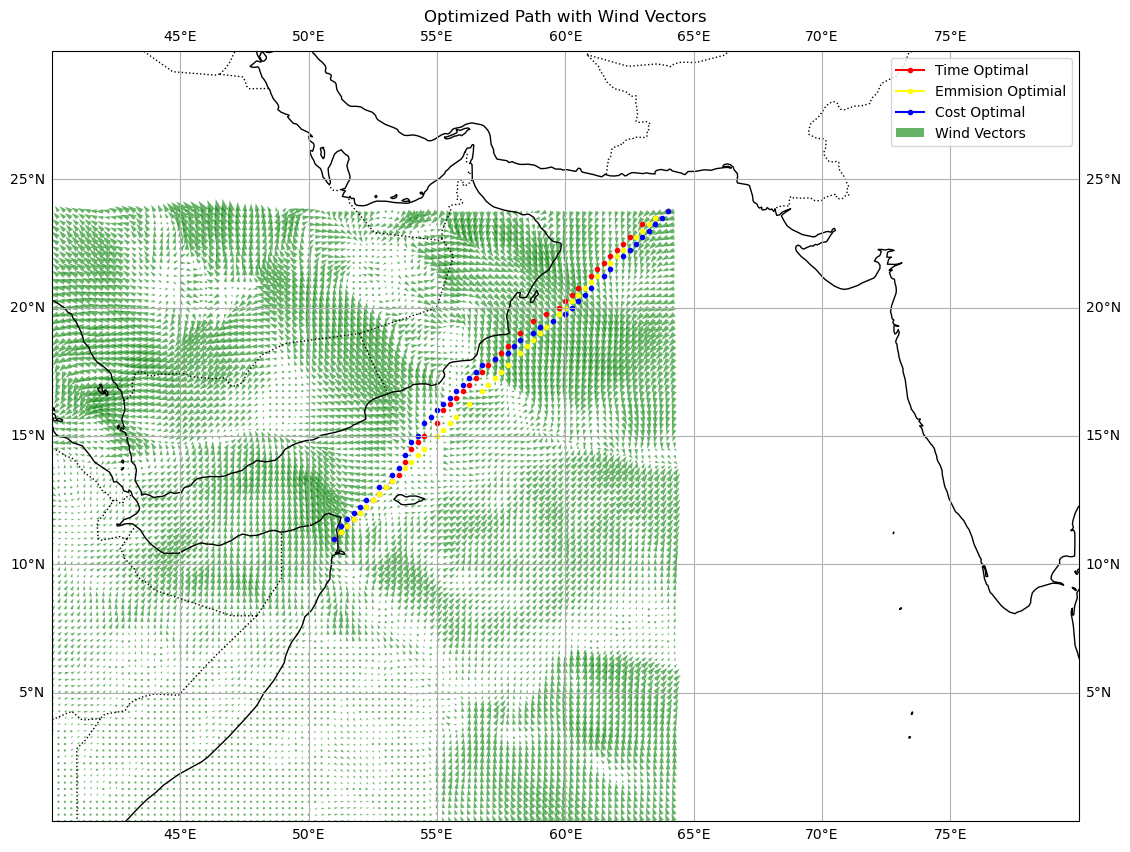

In [43]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
time_df = pd.DataFrame(path_t)
longitudes_t = [time_df.loc[i,0] for i in range(time_df.shape[0])]  # Example latitudes (Delhi, Mumbai, Bangalore, Kolkata)
latitudes_t = [time_df.loc[i,1] for i in range(time_df.shape[0])]
# Initialize the plot with a specific projection
plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set the extent of the map (you can adjust these values as needed)
ax.set_extent([40, 80, 0, 30], crs=ccrs.PlateCarree())

# Add features to the map (e.g., coastlines, borders)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
flag = True

# Plot the optimized path (in red and blue)
for lat, lon in zip(latitudes_t, longitudes_t):
    if flag:
        plt.plot(lon, lat, marker='o', color='red', markersize=3, transform=ccrs.PlateCarree(), label="Time Optimal")
        flag=False
    else:
        plt.plot(lon, lat, marker='o', color='red', markersize=3, transform=ccrs.PlateCarree())
        
flag=True

time_df = pd.DataFrame(path_s)
longitudes_co = [time_df.loc[i,0] for i in range(time_df.shape[0])]
latitudes_co = [time_df.loc[i,1] for i in range(time_df.shape[0])]
for lat, lon in zip(latitudes_co, longitudes_co):
    if flag:
        plt.plot(lon, lat, marker='o', color='yellow', markersize=3, transform=ccrs.PlateCarree(), label="Emmision Optimial")
        flag = False
    else:
        plt.plot(lon, lat, marker='o', color='yellow', markersize=3, transform=ccrs.PlateCarree())
time_df = pd.DataFrame(path_c)
longitudes_c = [time_df.loc[i,0] for i in range(time_df.shape[0])]
latitudes_c = [time_df.loc[i,1] for i in range(time_df.shape[0])]
flag = True
for lat, lon in zip(latitudes_c, longitudes_c):
    if flag:
        plt.plot(lon, lat, marker='o', color='blue', markersize=3, transform=ccrs.PlateCarree(), label="Cost Optimal")
        flag= False
    else:
        plt.plot(lon, lat, marker='o', color='blue', markersize=3, transform=ccrs.PlateCarree())

# Add the wind vectors using quiver
# Make sure your u10, v10, lats, and lons arrays are already defined and correspond to the grid points on your map
Lon, Lat = np.meshgrid(longitudes, latitudes)  # Adjust this to match the resolution of your wind data
plt.quiver(Lon, Lat, u[98], v[98], scale=500, color='green', alpha=0.6, transform=ccrs.PlateCarree(), label="Wind Vectors")

# Optionally add gridlines and labels
ax.gridlines(draw_labels=True)

# Add a title
plt.title('Optimized Path with Wind Vectors')
plt.legend()
# Show the plot
plt.show()



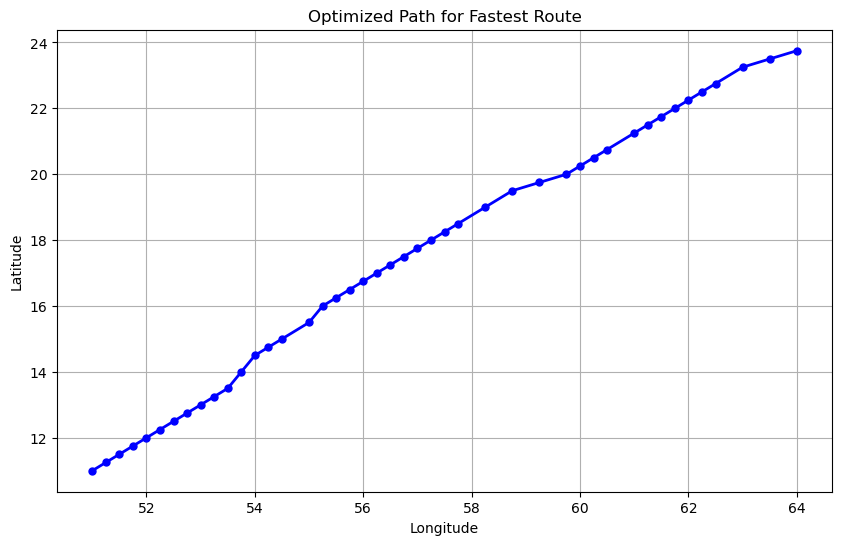

In [33]:
import matplotlib.pyplot as plt
import numpy as np

def plot_path(path, title="Optimized Path", color='blue'):
    """
    Function to plot the optimized path.
    
    Parameters:
    - path: Numpy array containing the latitude and longitude coordinates of the path.
    - title: Title of the plot.
    - color: Color of the path.
    """
    latitudes = path[:, 1]
    longitudes = path[:, 0]
    
    plt.figure(figsize=(10, 6))
    plt.plot(longitudes, latitudes, color=color, marker='o', linestyle='-', linewidth=2, markersize=5)
    plt.title(title)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True)
    plt.show()

# Example usage of the plot_path function
# Assuming `optimized_path` is the result from your HALEM function
# optimized_path = np.array(...)  # Replace this with your actual path data
# plot_path(optimized_path)

plot_path(path_t, title="Optimized Path for Fastest Route")


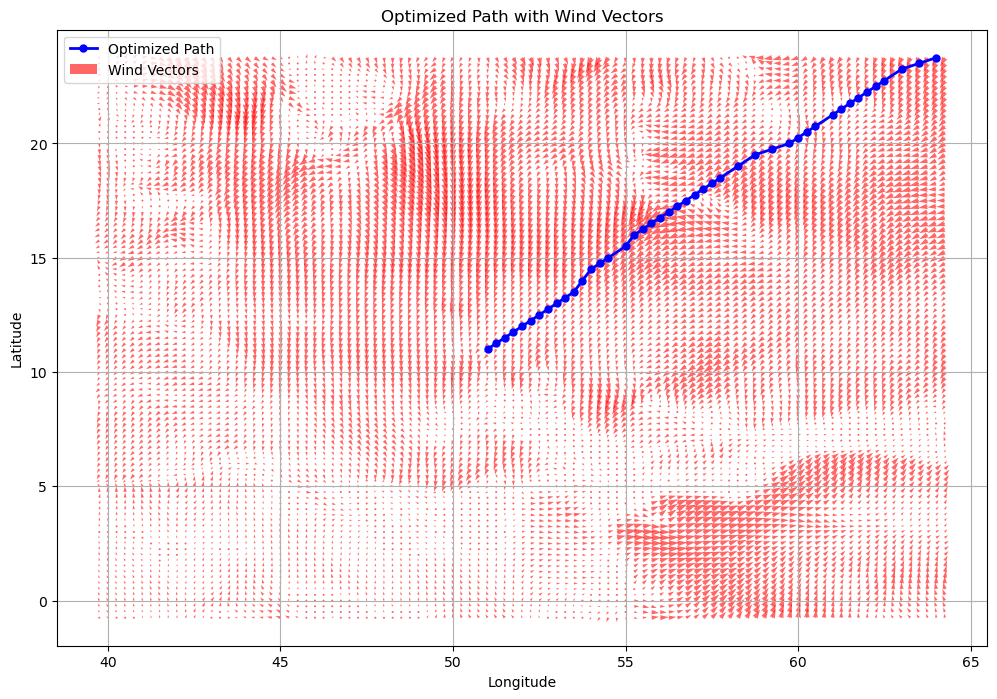

In [34]:
def plot_path_with_wind(path, u10, v10, lats, lons, title="Optimized Path with Wind Vectors", color='blue'):
    """
    Function to plot the optimized path with wind vectors.
    
    Parameters:
    - path: Numpy array containing the latitude and longitude coordinates of the path.
    - u10: Numpy array of u10 wind component.
    - v10: Numpy array of v10 wind component.
    - lats: Numpy array of latitude values for the wind data.
    - lons: Numpy array of longitude values for the wind data.
    - title: Title of the plot.
    - color: Color of the path.
    """
    latitudes = path[:, 1]
    longitudes = path[:, 0]
    
    plt.figure(figsize=(12, 8))
    
    # Plot the path
    plt.plot(longitudes, latitudes, color=color, marker='o', linestyle='-', linewidth=2, markersize=5, label="Optimized Path")
    
    # Plot the wind vectors using quiver
    plt.quiver(lons, lats, u10, v10, scale=500, color='red', alpha=0.6, label="Wind Vectors")
    
    plt.title(title)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_path_with_wind(path_t, u10[0], v10[0], latitudes, longitudes, title="Optimized Path with Wind Vectors",)

In [22]:
Lon.shape

(44, 44)

In [30]:
len(longitudes)

44